# La6 Assignment  : Data Classification (k-Nearest Neighbor)

Stduent ID:

Name:

### Problem: Predicting the age of abalone from physical measurements.

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.
Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

#### Feature Description:
1. Sex --> M, F, and I (infant)
2. Length (mm) --> Longest shell measurement
3. Diameter (mm) --> perpendicular to length
3. Height (mm) --> with meat in shell
5. Whole weight (grams) --> whole abalone
6. Shucked weight (grams) --> weight of meat
7. Viscera weight (grams) --> gut weight (after bleeding)
8. Shell weight (grams) --> after being dried
9. Age --> Young, Adult, and Old

### 1. Read data from ‘abalone.csv’

In [78]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('abalone.csv')

### 2. Basic Exploration & Data Cleaning & Feature Engineering (if any):

#### 2.1 How many records and columns this data set has?

In [80]:
df.shape

(500, 9)

#### 2.2 What is the data type of each feature?

In [81]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age                object
dtype: object

In [82]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,Adult
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,Adult
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,Young


#### 2.3 Data Cleaning:
Is there any missing value? If so, fix them.

In [83]:

display(df.isnull().sum(axis=0)) #ALL FEATURES HAS NO MISSING VALUES
display(df.iloc[df.index[(df.isnull().sum(axis=1)) > 0]])

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


#### 2.4 Feature Engineering: 
Is this dataset mixed-type data?, If so, transform all categorical to numeric.

In [84]:
categorical_data = df[['Sex','Age']]
display(categorical_data)

,Sex,Age
0,M,Old
1,M,Young
2,F,Adult
3,M,Adult
4,I,Young
...,...,...
495,F,Old
496,F,Adult
497,F,Old
498,F,Adult


In [85]:
print(categorical_data['Sex'].unique())
categorical_data_Sex = pd.get_dummies(categorical_data['Sex'])
display(categorical_data_Sex)

['M' 'F' 'I']


,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
495,1,0,0
496,1,0,0
497,1,0,0
498,1,0,0


In [86]:
if 'Sex' in df.columns:
    df = df.drop(columns=['Sex'])
    df = pd.concat([df, categorical_data_Sex],axis=1)
else:
    pass

display(df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,Old,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,Young,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,Adult,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,Adult,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,Young,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,0.625,0.500,0.150,0.9530,0.3445,0.2235,0.305,Old,1,0,0
496,0.640,0.520,0.175,1.2480,0.4245,0.2595,0.480,Adult,1,0,0
497,0.605,0.485,0.165,1.0105,0.4350,0.2090,0.300,Old,1,0,0
498,0.615,0.525,0.155,1.0385,0.4270,0.2315,0.345,Adult,1,0,0


#### 2.5 Defining Features (X) and Class (Y)

In [87]:
X = df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','F','M','I']]
Y = df[['Age']]
display(X.head(5))
display(Y.head(5))

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,M,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


,Age
0,Old
1,Young
2,Adult
3,Adult
4,Young


#### 2.6 Normalization

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X)

[[-0.41464593 -0.34069185 -1.06938744 ... -0.81309874  1.18973062
  -0.48117262]
 [-1.25530672 -1.29769144 -1.19146363 ... -0.81309874  1.18973062
  -0.48117262]
 [ 0.18582607  0.18565792 -0.09277791 ...  1.22986292 -0.84052641
  -0.48117262]
 ...
 [ 0.78629806  0.80770765  0.63967925 ...  1.22986292 -0.84052641
  -0.48117262]
 [ 0.86636099  1.19050748  0.39552686 ...  1.22986292 -0.84052641
  -0.48117262]
 [ 0.3859834   0.47275779  0.88383163 ... -0.81309874  1.18973062
  -0.48117262]]


### 3. Building and Evaluating K-Nearest Neighbors (KNN) Models

#### 3.1 Train and Test on the Entire Dataset:
1. Build the KNN model with k=2 on the entire dataset.
2. Report "Training Accuracy".

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') #n_neighbors is K value
knn.fit(X,Y) #Fit model to Dataset

# Prediction
y_predict = knn.predict(X)
# Evaluate model performance
accuracy = metrics.accuracy_score(Y, y_predict)
print('Training Accuracy: ', accuracy*100, '%')
print('Training Classification Error: ', (1-accuracy)*100, '%')
print('Confusion matrix:')
print(metrics.confusion_matrix(Y, y_predict))



Training Accuracy:  80.60000000000001 %
Training Classification Error:  19.399999999999995 %
Confusion matrix:
[[273   0   0]
 [ 54  57   0]
 [ 43   0  73]]


#### 3.2 Splitting Training-Test Data:
1. Stratified split the dataset into the training and test sets: training (70%), test (30%).
2. Build the KNN model with k=2 on the training set. 
3. Report "Testing Accuracy".

In [90]:
from sklearn.model_selection import train_test_split #Module for splitting data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)
print(X.shape)
print(Y.shape)


x_train shape:  (350, 10)
y_train shape:  (350, 1)
x_test shape:  (150, 10)
y_test shape:  (150, 1)
(500, 10)
(500, 1)


In [91]:
display(y_train.value_counts())
display(y_test.value_counts())

Age  
Adult    191
Young     81
Old       78
dtype: int64

Age  
Adult    82
Young    35
Old      33
dtype: int64

In [92]:
knn = KNeighborsClassifier(n_neighbors=2,metric = 'euclidean')
knn.fit(x_train, y_train) # Train x_train and y_train to create model for prediction
y_predict = knn.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_predict)
print('Tesing Accuracy: ', accuracy*100, '%')
print('Tesing Classification Error: ', (1-accuracy)*100, '%')
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))

Tesing Accuracy:  65.33333333333333 %
Tesing Classification Error:  34.66666666666667 %
Confusion matrix:
[[72  7  3]
 [19 14  0]
 [23  0 12]]


#### 3.3 Stratified k-fold Cross Validation:
1. Build the KNN model with k=2.
2. Evaluate with 10-fold cross validaiton.
3. Report "10-fold Cross Validation Accuracy".

In [93]:
from sklearn.model_selection import cross_validate
#cv = number of k-fold cross validation
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
cv_knn = cross_validate(knn, X,Y, cv=10, return_train_score=True)
print(cv_knn)

{'fit_time': array([0.00295877, 0.00199103, 0.00199103, 0.00199771, 0.00199533,
       0.00205183, 0.00199246, 0.00202847, 0.00186944, 0.00199556]), 'score_time': array([0.00203228, 0.00197387, 0.00199723, 0.00199127, 0.00199819,
       0.00193715, 0.00199533, 0.00299621, 0.00199509, 0.00201941]), 'test_score': array([0.72, 0.68, 0.72, 0.62, 0.66, 0.68, 0.64, 0.72, 0.58, 0.74]), 'train_score': array([0.80666667, 0.82222222, 0.80444444, 0.80444444, 0.80666667,
       0.80666667, 0.80666667, 0.8       , 0.80888889, 0.79777778])}


In [94]:
# Accuracy score for each fold 
# cv_knn['test_score']
print('Tesing Accuracy for each fold:', cv_knn['test_score'])

# Overall accuracy score for cross validaiton 
# .mean() is average accuracy / .std() is standard deviation: SD 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_knn['test_score'].mean(), cv_knn['test_score'].std()))

Tesing Accuracy for each fold: [0.72 0.68 0.72 0.62 0.66 0.68 0.64 0.72 0.58 0.74]
Cross Validation Accuracy: 0.676 +/- 0.049


### 4. What is the optimum (best) k value for the KNN model of this dataset?
1. Use 10-fold cross validation
2. Use k range from 1 t0 30

In [95]:
k_range = list(range(1,30))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_knn = cross_validate(knn, X,Y, cv=10)
    scores_cv.append(cv_knn['test_score'].mean())
    print(k, cv_knn['test_score'].mean())

1 0.606
2 0.6759999999999999
3 0.6759999999999999
4 0.6799999999999999
5 0.688
6 0.7
7 0.696
8 0.696
9 0.694
10 0.684
11 0.666
12 0.692
13 0.688
14 0.69
15 0.6839999999999999
16 0.698
17 0.698
18 0.706
19 0.7020000000000001
20 0.708
21 0.698
22 0.7
23 0.694
24 0.692
25 0.692
26 0.684
27 0.688
28 0.6900000000000001
29 0.692


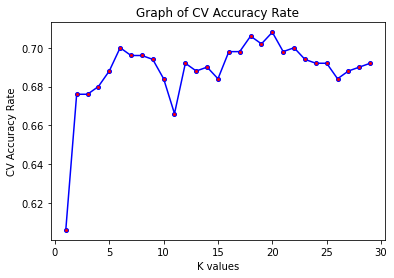

In [96]:
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o',markerfacecolor='red', markersize='4')
plt.xlabel('K values')
plt.ylabel('CV Accuracy Rate')
plt.title('Graph of CV Accuracy Rate')
plt.show()

In [97]:
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('Optimal K Values is ', index+1, ' Accuracy = ', value)
# INDEXES ALWAYS START WITH 0 so 19 is equal to point K = 20 in Graph!!!!!!!

Optimal K Values is  20  Accuracy =  0.708


### 5. KNN: Model Creation
Creating KNN model from the entrie data set, with the best k found in the previous step.

In [98]:
best_knn = KNeighborsClassifier(n_neighbors=20, metric = 'euclidean')
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

### 6. KNN: Deploying the model
What are the predicted class labels of the new data (abalone_new_sample.csv) using the best classification model?

#### 6.1 Data Pre-processing for New Data
Is data in "abalone_new_sample.csv" ready for prediction? If not, fix it first.

In [99]:
new_df = pd.read_csv('abalone_new_sample.csv')
display(new_df)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,I,0.380,0.300,0.100,0.286,0.1305,0.0560,0.09
1,F,0.565,0.455,0.130,1.058,0.4390,0.2645,0.30
2,M,0.545,0.440,0.165,0.744,0.2875,0.2040,0.25


In [100]:
new_cat_data = new_df[['Sex']]
new_cat_data_Sex = pd.get_dummies(new_cat_data['Sex'])

display(new_cat_data_Sex)

,F,I,M
0,0,1,0
1,1,0,0
2,0,0,1


In [101]:
if 'Sex' in new_df.columns:
    new_df = new_df.drop(columns=['Sex'])
    new_df = pd.concat([new_df, new_cat_data_Sex],axis=1)
else:
    pass

display(new_df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.380,0.300,0.100,0.286,0.1305,0.0560,0.09,0,1,0
1,0.565,0.455,0.130,1.058,0.4390,0.2645,0.30,1,0,0
2,0.545,0.440,0.165,0.744,0.2875,0.2040,0.25,0,0,1


#### 6.2 What are the predicted class labels of the new data using the best classification model?

In [102]:
X_new = new_df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','F','M','I']]
X_new_no_transfrom = X_new
display(X_new)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,M,I
0,0.380,0.300,0.100,0.286,0.1305,0.0560,0.09,0,0,1
1,0.565,0.455,0.130,1.058,0.4390,0.2645,0.30,1,0,0
2,0.545,0.440,0.165,0.744,0.2875,0.2040,0.25,0,1,0


In [103]:
X_new = sc.transform(X_new) #Normalize
print(best_knn.predict(X_new))
X_new_pred_result = best_knn.predict(X_new)
Y_new = pd.DataFrame(X_new_pred_result, columns = ['pred_Age'])

final_new_abalone = pd.concat([X_new_no_transfrom, Y_new],axis=1)
display(final_new_abalone)

['Young' 'Adult' 'Adult']


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,M,I,pred_Age
0,0.380,0.300,0.100,0.286,0.1305,0.0560,0.09,0,0,1,Young
1,0.565,0.455,0.130,1.058,0.4390,0.2645,0.30,1,0,0,Adult
2,0.545,0.440,0.165,0.744,0.2875,0.2040,0.25,0,1,0,Adult


In [104]:
final_new_abalone.to_csv('abalone_new_predict.csv')